In [17]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [18]:
# Load  dataframe
file_path = r"C:\Users\richa\Documents\01-2026 Instacart Basket Analysis\02 Data\Prepared Data\ords_prods_merged_customers.pkl"
ords_prods_merge = pd.read_pickle(file_path)

In [19]:
#Remove PII
ords_prods_merge = ords_prods_merge.drop(columns=['first_name', 'surname'])


In [20]:
#create region column
northeast = ['Maine','New York','Pennsylvania','New Jersey','Massachusetts','Vermont','New Hampshire','Rhode Island','Connecticut']
midwest = ['Illinois','Indiana','Michigan','Ohio','Wisconsin','Minnesota','Iowa','Missouri','Kansas','Nebraska','North Dakota','South Dakota']
south = ['Texas','Florida','Georgia','Alabama','Mississippi','Tennessee','North Carolina','South Carolina','Virginia','Arkansas','Louisiana','Kentucky','Oklahoma','West Virginia','Delaware','Maryland']
west = ['California','Washington','Oregon','Nevada','Arizona','Utah','Colorado','New Mexico','Idaho','Montana','Wyoming','Alaska','Hawaii']

def assign_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'

ords_prods_merge['Region'] = ords_prods_merge['state'].apply(assign_region)


In [21]:
#3b compare spending by region
ords_prods_merge.groupby('Region')['prices'].mean()

Region
Midwest      12.715483
Northeast    11.554997
Other        11.379543
South        12.244780
West         11.319834
Name: prices, dtype: float32

In [22]:
#4 Exclusion flag for low activity customers
order_counts = ords_prods_merge.groupby('user_id')['order_number'].max()
active_users = order_counts[order_counts >= 5].index

df_active = ords_prods_merge[ords_prods_merge['user_id'].isin(active_users)]


In [23]:
df_active.to_pickle(r'C:\Users\richa\Documents\01-2026 Instacart Basket Analysis\02 Data\Prepared Data\instacart_active_customers.pkl')


In [27]:
#customer profile
def profile(row):
    if row['age'] < 30 and row['n_dependents'] == 0:
        return 'Young Single'
    elif row['age'] < 30 and row['n_dependents'] > 0:
        return 'Young Parent'
    elif row['age'] >= 30 and row['age'] < 50 and row['n_dependents'] > 0:
        return 'Established Family'
    elif row['age'] >= 50:
        return 'Older Adult'
    else:
        return 'Other'


In [29]:

df_active = ords_prods_merge[ords_prods_merge['order_number'] >= 5].copy()


In [31]:
df_active['customer_profile'] = df_active.apply(profile, axis=1)

In [32]:
#check
df_active['customer_profile'].value_counts()

customer_profile
Older Adult           12143415
Established Family     5769618
Young Parent           3452202
Other                  1911584
Young Single           1138058
Name: count, dtype: int64

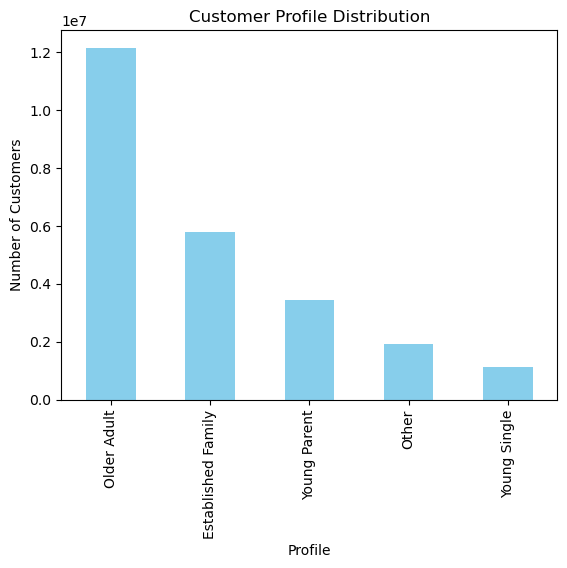

In [33]:
#6 Visualisation
df_active['customer_profile'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Customer Profile Distribution')
plt.xlabel('Profile')
plt.ylabel('Number of Customers')
plt.show()


In [34]:
#7 Aggregation
profile_summary = df_active.groupby('customer_profile').agg({
    'prices': ['max', 'mean', 'min'],
    'order_number': ['max', 'mean', 'min']
})
print(profile_summary)


                     prices                 order_number               
                        max       mean  min          max       mean min
customer_profile                                                       
Established Family  99999.0  11.714381  1.0           99  22.013349   5
Older Adult         99999.0  11.621285  1.0           99  21.937672   5
Other               99999.0  12.638399  1.0           99  21.961292   5
Young Parent        99999.0  11.972392  1.0           99  21.936541   5
Young Single        99999.0  12.818859  1.0           99  21.780015   5


In [36]:
#8 compare region and department
# Profiles vs Region
profile_region = pd.crosstab(df_active['customer_profile'], df_active['Region'])
print(profile_region)

Region              Midwest  Northeast   Other    South     West
customer_profile                                                
Established Family  1358127    1026819  106177  1808629  1469866
Older Adult         2827914    2159271  226851  3789017  3140362
Other                457483     317545   36746   615369   484441
Young Parent         808454     603778   75224  1082857   881889
Young Single         259778     207858   14972   373244   282206


In [37]:
# Profiles vs Department
profile_dept = pd.crosstab(df_active['customer_profile'], df_active['department_id'])
print(profile_dept)

department_id           1      2       3        4      5      6        7   \
customer_profile                                                            
Established Family  381693   6015  207657  1710214  25283  47084   474466   
Older Adult         814882  13455  439479  3593962  52260  97402  1022367   
Other               125984   2236   70337   569212   9483  15684   160958   
Young Parent        231921   4154  124989  1015690  16236  28135   283327   
Young Single         73134   1306   40868   338013   4710   9595    95329   

department_id          8       9      10  ...      12      13      14      15  \
customer_profile                          ...                                   
Established Family  16165  149123   6552  ...  123546  328202  123855  185158   
Older Adult         36210  315742  13561  ...  262155  689729  259895  391279   
Other                5770   48414   2156  ...   39893  107393   40664   61675   
Young Parent        10503   90458   4053  ...   74243  

In [ ]:
#Older aduts dominate in region and department there is a link.

In [38]:
#exporting active customer data
df_active.to_pickle(r"C:\Users\richa\Documents\01-2026 Instacart Basket Analysis\02 Data\Prepared Data\instacart_active_customers.pkl")